In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_orig = pd.read_csv('hmda_2017_nationwide_all-records_labels.csv')

/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df_orig.columns

Index(['as_of_year', 'respondent_id', 'agency_name', 'agency_abbr',
       'agency_code', 'loan_type_name', 'loan_type', 'property_type_name',
       'property_type', 'loan_purpose_name', 'loan_purpose',
       'owner_occupancy_name', 'owner_occupancy', 'loan_amount_000s',
       'preapproval_name', 'preapproval', 'action_taken_name', 'action_taken',
       'msamd_name', 'msamd', 'state_name', 'state_abbr', 'state_code',
       'county_name', 'county_code', 'census_tract_number',
       'applicant_ethnicity_name', 'applicant_ethnicity',
       'co_applicant_ethnicity_name', 'co_applicant_ethnicity',
       'applicant_race_name_1', 'applicant_race_1', 'applicant_race_name_2',
       'applicant_race_2', 'applicant_race_name_3', 'applicant_race_3',
       'applicant_race_name_4', 'applicant_race_4', 'applicant_race_name_5',
       'applicant_race_5', 'co_applicant_race_name_1', 'co_applicant_race_1',
       'co_applicant_race_name_2', 'co_applicant_race_2',
       'co_applicant_race_name_

In [5]:
df_orig['action_taken_name'].value_counts()

Loan originated                                        7339057
Loan purchased by the institution                      2086676
Application denied by financial institution            2009743
Application withdrawn by applicant                     1696289
File closed for incompleteness                          601148
Application approved but not accepted                   409797
Preapproval request denied by financial institution     106680
Preapproval request approved but not accepted            36106
Name: action_taken_name, dtype: int64

In [6]:
df_sub = df_orig[['applicant_race_name_1', 'applicant_ethnicity_name', 'action_taken_name', 'applicant_income_000s', 'tract_to_msamd_income', 'hoepa_status_name', 'loan_amount_000s']]
df_sub

,applicant_race_name_1,applicant_ethnicity_name,action_taken_name,applicant_income_000s,tract_to_msamd_income,hoepa_status_name,loan_amount_000s
0,Black or African American,Not Hispanic or Latino,Application withdrawn by applicant,12.0,47.540001,Not a HOEPA loan,53.0
1,White,Not Hispanic or Latino,Application denied by financial institution,60.0,86.239998,Not a HOEPA loan,168.0
2,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",File closed for incompleteness,50.0,63.939999,Not a HOEPA loan,103.0
3,White,Not Hispanic or Latino,Loan originated,53.0,74.290001,Not a HOEPA loan,88.0
4,White,Not Hispanic or Latino,Application withdrawn by applicant,29.0,79.250000,Not a HOEPA loan,90.0
...,...,...,...,...,...,...,...
14285491,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Loan originated,167.0,138.639999,Not a HOEPA loan,832.0
14285492,"Information not provided by applicant in mail,...",Not Hispanic or Latino,Application denied by financial institution,193.0,138.639999,Not a HOEPA loan,840.0
14285493,"Information not provided by applicant in mail,...","Information not provided by applicant in mail,...",Loan originated,175.0,138.639999,Not a HOEPA loan,476.0
14285494,White,Not Hispanic or Latino,Application denied by financial institution,55.0,88.519997,Not a HOEPA loan,141.0


In [7]:
df_sub = df_sub[~df_sub['applicant_race_name_1'].str.contains('Information not provided')]
df_sub = df_sub[~df_sub['applicant_race_name_1'].str.contains('Not applicable')]
df_sub = df_sub[df_sub['hoepa_status_name'].str.contains('Not')]
df_sub = df_sub[~df_sub['action_taken_name'].str.contains('withdrawn')]
df_sub = df_sub[~df_sub['action_taken_name'].str.contains('incomplete')]

In [8]:
df_sub.head()

,applicant_race_name_1,applicant_ethnicity_name,action_taken_name,applicant_income_000s,tract_to_msamd_income,hoepa_status_name,loan_amount_000s
1,White,Not Hispanic or Latino,Application denied by financial institution,60.0,86.239998,Not a HOEPA loan,168.0
3,White,Not Hispanic or Latino,Loan originated,53.0,74.290001,Not a HOEPA loan,88.0
7,Asian,Not Hispanic or Latino,Application denied by financial institution,51.0,116.010002,Not a HOEPA loan,185.0
9,White,Not Hispanic or Latino,Loan originated,31.0,71.129997,Not a HOEPA loan,94.0
10,Black or African American,Not Hispanic or Latino,Application denied by financial institution,26.0,100.750000,Not a HOEPA loan,95.0


In [9]:
approved = ['Application approved but not accepted', 'Loan originated', 'Loan purchased by the institution', 'Preapproval request approved but not accepted']
not_approved = ['Application denied by financial institution', 'Preapproval request denied by financial institution']

def filter_action(x):
    if x.strip() in approved:
        return 'Approved'
    elif x.strip() in not_approved:
        return 'Not approved'
    else: 
        None

In [10]:
df_sub['action'] = df_sub['action_taken_name'].apply(filter_action)

In [11]:
# exclude those who have hoepa loan since it is a rare and high cost loan
df_sub

,applicant_race_name_1,applicant_ethnicity_name,action_taken_name,applicant_income_000s,tract_to_msamd_income,hoepa_status_name,loan_amount_000s,action
1,White,Not Hispanic or Latino,Application denied by financial institution,60.0,86.239998,Not a HOEPA loan,168.0,Not approved
3,White,Not Hispanic or Latino,Loan originated,53.0,74.290001,Not a HOEPA loan,88.0,Approved
7,Asian,Not Hispanic or Latino,Application denied by financial institution,51.0,116.010002,Not a HOEPA loan,185.0,Not approved
9,White,Not Hispanic or Latino,Loan originated,31.0,71.129997,Not a HOEPA loan,94.0,Approved
10,Black or African American,Not Hispanic or Latino,Application denied by financial institution,26.0,100.750000,Not a HOEPA loan,95.0,Not approved
...,...,...,...,...,...,...,...,...
14285487,White,Not Hispanic or Latino,Application approved but not accepted,31.0,120.540001,Not a HOEPA loan,188.0,Approved
14285488,Asian,Not Hispanic or Latino,Application denied by financial institution,70.0,138.639999,Not a HOEPA loan,340.0,Not approved
14285489,White,Not Hispanic or Latino,Application denied by financial institution,84.0,208.770004,Not a HOEPA loan,324.0,Not approved
14285494,White,Not Hispanic or Latino,Application denied by financial institution,55.0,88.519997,Not a HOEPA loan,141.0,Not approved


In [12]:
df_sub['applicant_ethnicity_name'].value_counts()

Not Hispanic or Latino                                                               8081609
Hispanic or Latino                                                                    983918
Information not provided by applicant in mail, Internet, or telephone application     152614
Not applicable                                                                          3342
Name: applicant_ethnicity_name, dtype: int64

In [13]:
combined = df_sub['applicant_race_name_1'] + ', ' + df_sub['applicant_ethnicity_name']
splitted = combined.str.split(',')
splitted

1                            [White,  Not Hispanic or Latino]
3                            [White,  Not Hispanic or Latino]
7                            [Asian,  Not Hispanic or Latino]
9                            [White,  Not Hispanic or Latino]
10          [Black or African American,  Not Hispanic or L...
                                  ...                        
14285487                     [White,  Not Hispanic or Latino]
14285488                     [Asian,  Not Hispanic or Latino]
14285489                     [White,  Not Hispanic or Latino]
14285494                     [White,  Not Hispanic or Latino]
14285495                     [White,  Not Hispanic or Latino]
Length: 9221483, dtype: object

In [14]:
a = splitted.apply(lambda x: 'Hispanic/Latino ' + x[0] if (x[0].strip() == 'White') & (x[1].strip() == 'Hispanic or Latino') else x[0])
a

1                               White
3                               White
7                               Asian
9                               White
10          Black or African American
                      ...            
14285487                        White
14285488                        Asian
14285489                        White
14285494                        White
14285495                        White
Length: 9221483, dtype: object

In [15]:
b = a.value_counts()
b

White                                        6792624
Hispanic/Latino White                         928685
Black or African American                     799753
Asian                                         567335
American Indian or Alaska Native               85866
Native Hawaiian or Other Pacific Islander      47220
dtype: int64

<AxesSubplot:>

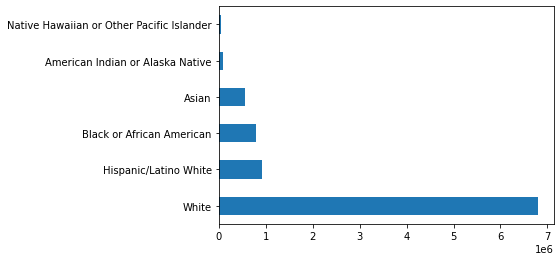

In [16]:
b.plot(kind='barh')

In [17]:
df = df_sub.assign(updated_race = a)

In [18]:
df

,applicant_race_name_1,applicant_ethnicity_name,action_taken_name,applicant_income_000s,tract_to_msamd_income,hoepa_status_name,loan_amount_000s,action,updated_race
1,White,Not Hispanic or Latino,Application denied by financial institution,60.0,86.239998,Not a HOEPA loan,168.0,Not approved,White
3,White,Not Hispanic or Latino,Loan originated,53.0,74.290001,Not a HOEPA loan,88.0,Approved,White
7,Asian,Not Hispanic or Latino,Application denied by financial institution,51.0,116.010002,Not a HOEPA loan,185.0,Not approved,Asian
9,White,Not Hispanic or Latino,Loan originated,31.0,71.129997,Not a HOEPA loan,94.0,Approved,White
10,Black or African American,Not Hispanic or Latino,Application denied by financial institution,26.0,100.750000,Not a HOEPA loan,95.0,Not approved,Black or African American
...,...,...,...,...,...,...,...,...,...
14285487,White,Not Hispanic or Latino,Application approved but not accepted,31.0,120.540001,Not a HOEPA loan,188.0,Approved,White
14285488,Asian,Not Hispanic or Latino,Application denied by financial institution,70.0,138.639999,Not a HOEPA loan,340.0,Not approved,Asian
14285489,White,Not Hispanic or Latino,Application denied by financial institution,84.0,208.770004,Not a HOEPA loan,324.0,Not approved,White
14285494,White,Not Hispanic or Latino,Application denied by financial institution,55.0,88.519997,Not a HOEPA loan,141.0,Not approved,White


In [19]:
dff = df[['updated_race', 'action', 'tract_to_msamd_income']]

In [20]:
dff

,updated_race,action,tract_to_msamd_income
1,White,Not approved,86.239998
3,White,Approved,74.290001
7,Asian,Not approved,116.010002
9,White,Approved,71.129997
10,Black or African American,Not approved,100.750000
...,...,...,...
14285487,White,Approved,120.540001
14285488,Asian,Not approved,138.639999
14285489,White,Not approved,208.770004
14285494,White,Not approved,88.519997


In [123]:
groups = dff.groupby(['updated_race', 'action']).count()
groups

tract_to_msamd_income
updated_race                              action                             
American Indian or Alaska Native          Approved                      56106
                                          Not approved                  26472
Asian                                     Approved                     471500
                                          Not approved                  86110
Black or African American                 Approved                     525374
                                          Not approved                 239879
Hispanic/Latino White                     Approved                     715814
                                          Not approved                 194737
Native Hawaiian or Other Pacific Islander Approved                      35289
                                          Not approved                  10667
White                                     Approved                    5607252
                                          Not approved                1060220

In [127]:
count = dff.groupby('updated_race').count()['action']
count

updated_race
American Indian or Alaska Native               85866
Asian                                         567335
Black or African American                     799753
Hispanic/Latino White                         928685
Native Hawaiian or Other Pacific Islander      47220
White                                        6792624
Name: action, dtype: int64

In [138]:
groups

tract_to_msamd_income
updated_race                              action                             
American Indian or Alaska Native          Approved                      56106
                                          Not approved                  26472
Asian                                     Approved                     471500
                                          Not approved                  86110
Black or African American                 Approved                     525374
                                          Not approved                 239879
Hispanic/Latino White                     Approved                     715814
                                          Not approved                 194737
Native Hawaiian or Other Pacific Islander Approved                      35289
                                          Not approved                  10667
White                                     Approved                    5607252
                                          Not approved                1060220

In [139]:
count

updated_race
American Indian or Alaska Native               85866
Asian                                         567335
Black or African American                     799753
Hispanic/Latino White                         928685
Native Hawaiian or Other Pacific Islander      47220
White                                        6792624
Name: action, dtype: int64

In [21]:
uniq_race = dff.updated_race.unique()

White
Asian
Black or African American
Hispanic/Latino White
American Indian or Alaska Native
Native Hawaiian or Other Pacific Islander


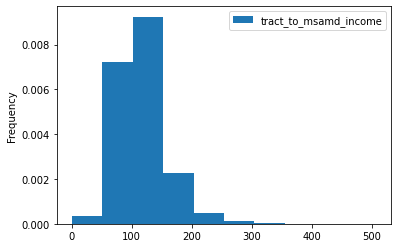

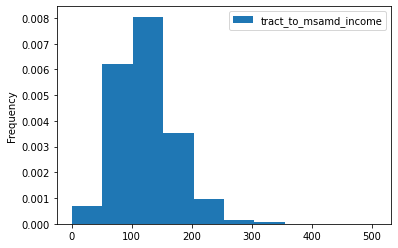

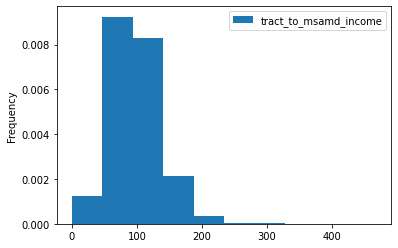

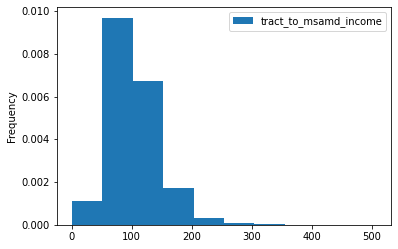

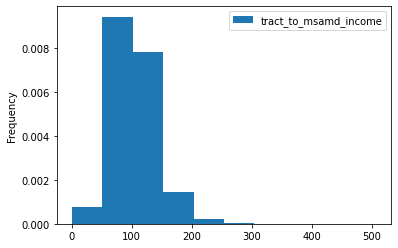

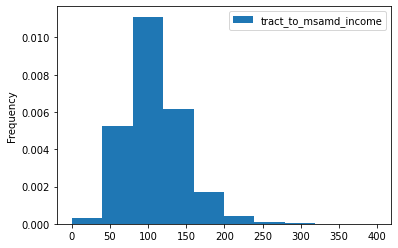

In [22]:
for i in uniq_race:
    print(i)
    dff[dff['updated_race'] == i].plot(kind='hist', density=True)

In [23]:
dff

,updated_race,action,tract_to_msamd_income
1,White,Not approved,86.239998
3,White,Approved,74.290001
7,Asian,Not approved,116.010002
9,White,Approved,71.129997
10,Black or African American,Not approved,100.750000
...,...,...,...
14285487,White,Approved,120.540001
14285488,Asian,Not approved,138.639999
14285489,White,Not approved,208.770004
14285494,White,Not approved,88.519997


In [24]:
uniq_race

array(['White', 'Asian', 'Black or African American',
       'Hispanic/Latino White', 'American Indian or Alaska Native',
       'Native Hawaiian or Other Pacific Islander'], dtype=object)

In [25]:
print(uniq_race[0])
w = dff[dff['updated_race'] == uniq_race[0]].groupby('action').mean()
w

White


,tract_to_msamd_income
action,
Approved,117.301518
Not approved,110.989989


In [26]:
print(uniq_race[1])
a = dff[dff['updated_race'] == uniq_race[1]].groupby('action').mean()
a

Asian


,tract_to_msamd_income
action,
Approved,124.435816
Not approved,117.592282


In [27]:
print(uniq_race[2])
b = dff[dff['updated_race'] == uniq_race[2]].groupby('action').mean()
b

Black or African American


,tract_to_msamd_income
action,
Approved,100.727468
Not approved,91.924282


In [28]:
print(uniq_race[3])
hw = dff[dff['updated_race'] == uniq_race[3]].groupby('action').mean()
hw

Hispanic/Latino White


,tract_to_msamd_income
action,
Approved,104.111369
Not approved,99.078501


In [29]:
print(uniq_race[4])
ai = dff[dff['updated_race'] == uniq_race[4]].groupby('action').mean()
ai

American Indian or Alaska Native


,tract_to_msamd_income
action,
Approved,106.794716
Not approved,98.491122


In [30]:
print(uniq_race[5])
hp = dff[dff['updated_race'] == uniq_race[5]].groupby('action').mean()
hp

Native Hawaiian or Other Pacific Islander


,tract_to_msamd_income
action,
Approved,110.197257
Not approved,102.658895


In [31]:
hp.tract_to_msamd_income[0]

110.19725690834811

In [32]:
lst = np.array([w,a,b,hw,ai,hp])

Text(0.5, 1.0, 'Difference of "tract_to_msamd_income" Means Between "Approved" and "Not approved"')

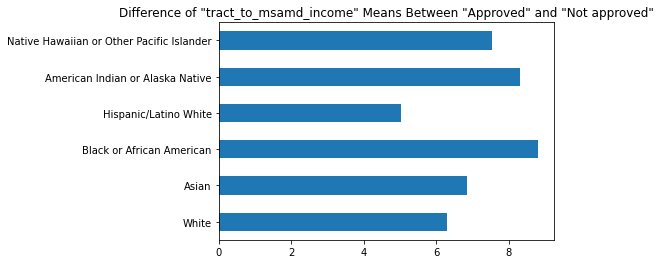

In [33]:
r_diff_dict = {}

for i in range(len(uniq_race)):
    r_diff_dict[uniq_race[i]] = lst[i][0][0] - lst[i][1][0]

pd.Series(r_diff_dict).plot(kind='barh')
plt.title('Difference of "tract_to_msamd_income" Means Between "Approved" and "Not approved"')

In [34]:
df

,applicant_race_name_1,applicant_ethnicity_name,action_taken_name,applicant_income_000s,tract_to_msamd_income,hoepa_status_name,loan_amount_000s,action,updated_race
1,White,Not Hispanic or Latino,Application denied by financial institution,60.0,86.239998,Not a HOEPA loan,168.0,Not approved,White
3,White,Not Hispanic or Latino,Loan originated,53.0,74.290001,Not a HOEPA loan,88.0,Approved,White
7,Asian,Not Hispanic or Latino,Application denied by financial institution,51.0,116.010002,Not a HOEPA loan,185.0,Not approved,Asian
9,White,Not Hispanic or Latino,Loan originated,31.0,71.129997,Not a HOEPA loan,94.0,Approved,White
10,Black or African American,Not Hispanic or Latino,Application denied by financial institution,26.0,100.750000,Not a HOEPA loan,95.0,Not approved,Black or African American
...,...,...,...,...,...,...,...,...,...
14285487,White,Not Hispanic or Latino,Application approved but not accepted,31.0,120.540001,Not a HOEPA loan,188.0,Approved,White
14285488,Asian,Not Hispanic or Latino,Application denied by financial institution,70.0,138.639999,Not a HOEPA loan,340.0,Not approved,Asian
14285489,White,Not Hispanic or Latino,Application denied by financial institution,84.0,208.770004,Not a HOEPA loan,324.0,Not approved,White
14285494,White,Not Hispanic or Latino,Application denied by financial institution,55.0,88.519997,Not a HOEPA loan,141.0,Not approved,White


In [35]:
dfff = dff.copy()

In [49]:
dfff['loan_prop'] = df.loan_amount_000s / df.applicant_income_000s
dfff = dfff.drop(['tract_to_msamd_income'], axis = 1)
dfff

,updated_race,action,loan_prop
1,White,Not approved,2.800000
3,White,Approved,1.660377
7,Asian,Not approved,3.627451
9,White,Approved,3.032258
10,Black or African American,Not approved,3.653846
...,...,...,...
14285487,White,Approved,6.064516
14285488,Asian,Not approved,4.857143
14285489,White,Not approved,3.857143
14285494,White,Not approved,2.563636


In [106]:
x = dfff.groupby(['updated_race', 'action']).mean().unstack()
x


loan_prop             
action                                     Approved Not approved
updated_race                                                    
American Indian or Alaska Native           2.559950     2.784708
Asian                                      3.101062     4.222266
Black or African American                  2.688746     2.816095
Hispanic/Latino White                      2.972438     3.159720
Native Hawaiian or Other Pacific Islander  3.043613     3.530061
White                                      2.493813     3.086262

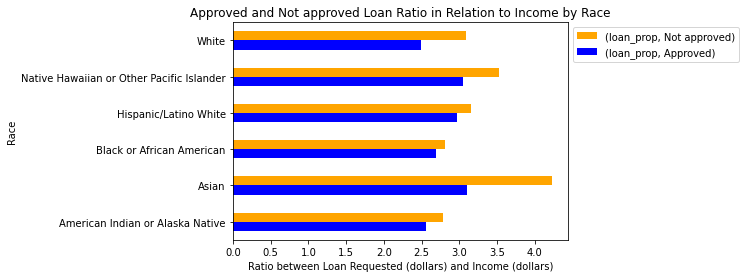

In [154]:
x.plot(kind='barh', color=['blue', 'orange'])
plt.ylabel('Race')
plt.xlabel('Ratio between Loan Requested (dollars) and Income (dollars)')
plt.title('Approved and Not approved Loan Ratio in Relation to Income by Race')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1, 1)) 

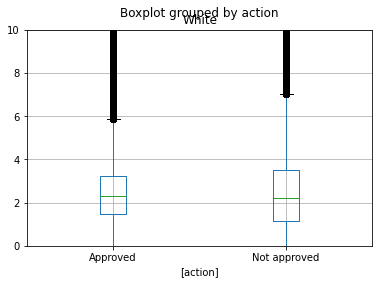

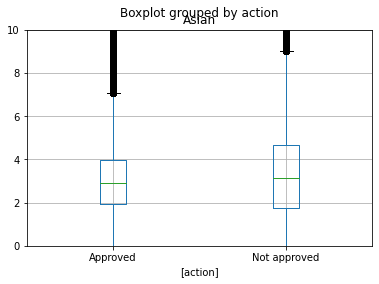

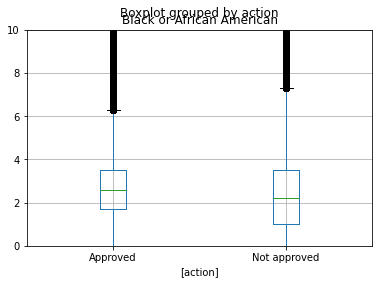

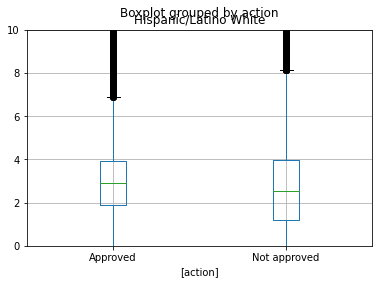

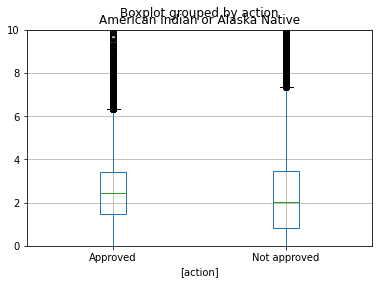

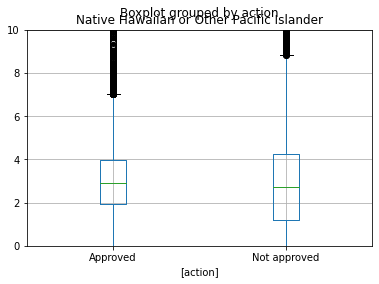

In [37]:
for i in uniq_race:
    curr_race = dfff[dfff['updated_race'] == i]
    curr_race.boxplot(by='action')
    plt.ylim(0 , 10)
    plt.title(i) 

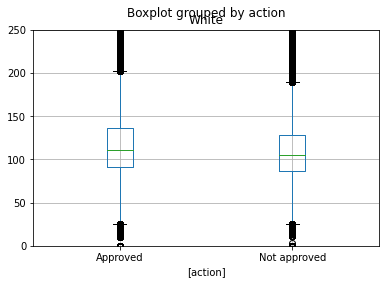

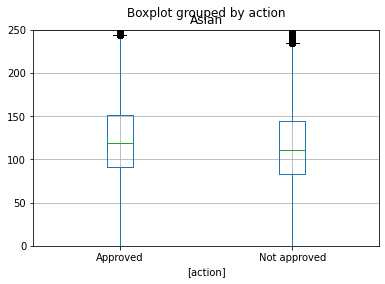

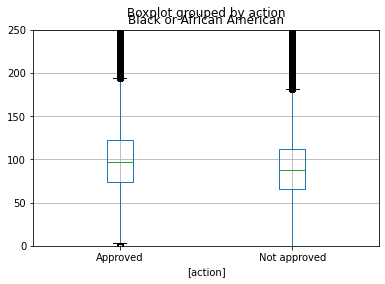

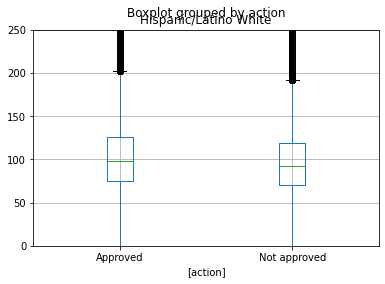

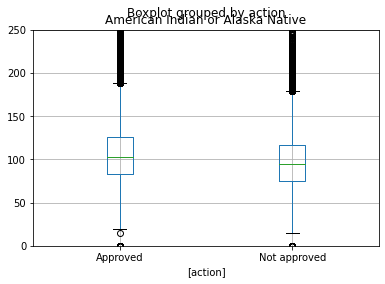

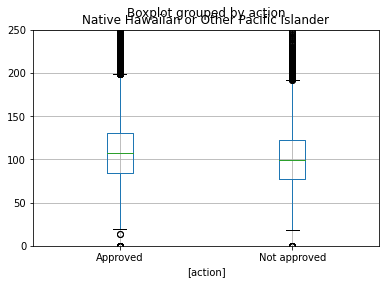

In [38]:
for i in uniq_race:
    curr_race = dff[dff['updated_race'] == i]
    # app = curr_race[curr_race['action'] == 'Approved']
    # not_app = curr_race[curr_race['action'] == 'Not approved']
    curr_race.boxplot(by='action')
    plt.ylim(0 , 250)
    plt.title(i)

In [101]:
res_diff = {}
for i in uniq_race:    
    now = dff[dff['updated_race'] == i]
    num = np.abs(list(now.groupby('action').mean()['tract_to_msamd_income'].diff()))[1]
    res_diff[i] = num

Text(0.5, 1.0, 'Difference in Mean Income Tract Percentile by Race')

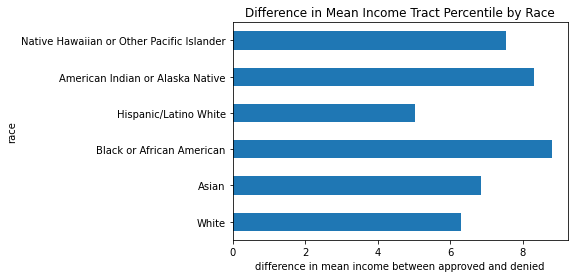

In [104]:
pd.Series(res_diff).plot(kind='barh')
plt.ylabel('race')
plt.xlabel('difference in mean income between approved and denied')
plt.title('Difference in Mean Income Tract Percentile by Race')

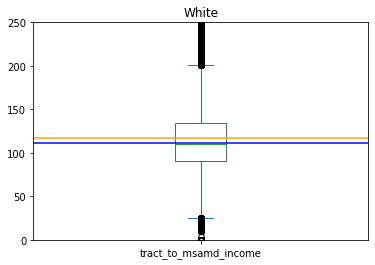

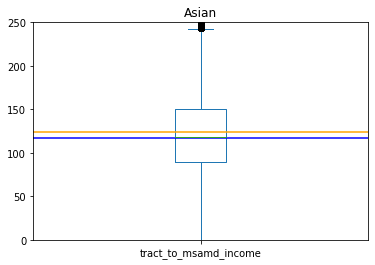

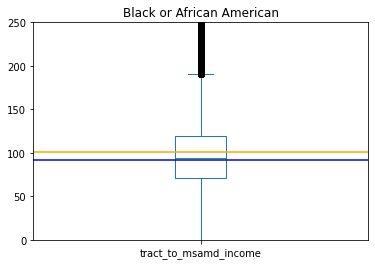

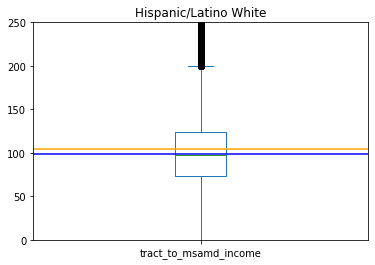

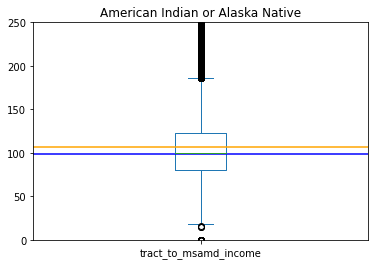

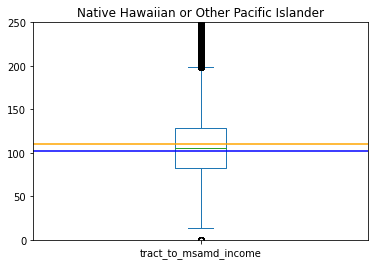

In [39]:
lst = [np.array(w),np.array(a),np.array(b),np.array(hw),np.array(ai),np.array(hp)]
count = 0
for i in uniq_race:
    curr = lst[count]
    dff[dff['updated_race'] == i].plot(kind='box')
    plt.axhline(curr[0], c='orange')
    plt.axhline(curr[1], c='blue')
    plt.ylim(0 , 250)
    plt.title(i)
    count += 1

In [40]:
dff

,updated_race,action,tract_to_msamd_income
1,White,Not approved,86.239998
3,White,Approved,74.290001
7,Asian,Not approved,116.010002
9,White,Approved,71.129997
10,Black or African American,Not approved,100.750000
...,...,...,...
14285487,White,Approved,120.540001
14285488,Asian,Not approved,138.639999
14285489,White,Not approved,208.770004
14285494,White,Not approved,88.519997


Text(0, 0.5, 'race')

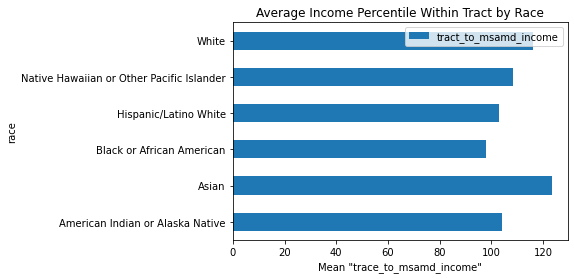

In [72]:
dff.groupby('updated_race').mean().plot(kind='barh')
plt.title('Average Income Percentile Within Tract by Race')
plt.xlabel('Mean "trace_to_msamd_income"')
plt.ylabel('race')

In [41]:
group_total = dff.groupby('updated_race').count()

In [42]:
race_action = dff.groupby(['updated_race', 'action']).count()
race_action

tract_to_msamd_income
updated_race                              action                             
American Indian or Alaska Native          Approved                      56106
                                          Not approved                  26472
Asian                                     Approved                     471500
                                          Not approved                  86110
Black or African American                 Approved                     525374
                                          Not approved                 239879
Hispanic/Latino White                     Approved                     715814
                                          Not approved                 194737
Native Hawaiian or Other Pacific Islander Approved                      35289
                                          Not approved                  10667
White                                     Approved                    5607252
                                          Not approved                1060220

In [43]:
bar_data = race_action / group_total
bar_data

action  \
updated_race                              action                 
American Indian or Alaska Native          Approved         NaN   
                                          Not approved     NaN   
Asian                                     Approved         NaN   
                                          Not approved     NaN   
Black or African American                 Approved         NaN   
                                          Not approved     NaN   
Hispanic/Latino White                     Approved         NaN   
                                          Not approved     NaN   
Native Hawaiian or Other Pacific Islander Approved         NaN   
                                          Not approved     NaN   
White                                     Approved         NaN   
                                          Not approved     NaN   

                                                        tract_to_msamd_income  
updated_race                              action                               
American Indian or Alaska Native          Approved                   0.679430  
                                          Not approved               0.320570  
Asian                                     Approved                   0.845573  
                                          Not approved               0.154427  
Black or African American                 Approved                   0.686536  
                                          Not approved               0.313464  
Hispanic/Latino White                     Approved                   0.786133  
                                          Not approved               0.213867  
Native Hawaiian or Other Pacific Islander Approved                   0.767887  
                                          Not approved               0.232113  
White                                     Approved                   0.840986  
                                          Not approved               0.159014

In [44]:
bar_dict_approved = {'American Indian or Alaska Native': 0.679430, 
            'Asian': 0.845573,
            'Black or African American': 0.686536,
            'Hispanic/Latino White': 0.786133,
            'Native Hawaiian or Other Pacific Islander': 0.767887,
            'White': 0.840986}

bar_dict_denied = {'American Indian or Alaska Native': 1-0.679430, 
            'Asian': 1-0.845573,
            'Black or African American': 1-0.686536,
            'Hispanic/Latino White': 1-0.786133,
            'Native Hawaiian or Other Pacific Islander': 1-0.767887,
            'White': 1-0.840986}

Text(0.5, 1.0, 'Proportion of "Approved" by Race')

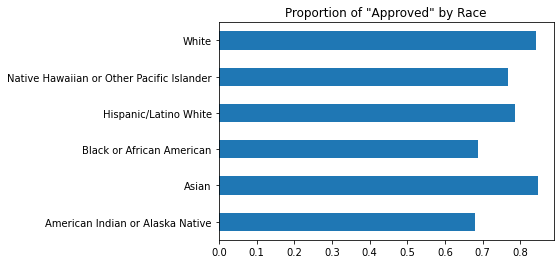

In [45]:
pd.Series(bar_dict_approved).plot(kind='barh')
plt.title('Proportion of "Approved" by Race')

Text(0, 0.5, 'Race')

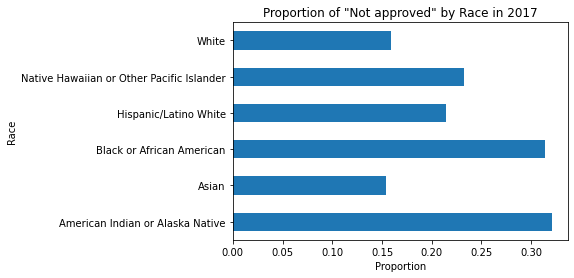

In [140]:
pd.Series(bar_dict_denied).plot(kind='barh')
plt.title('Proportion of "Not approved" by Race in 2017')
plt.xlabel('Proportion')
plt.ylabel('Race')

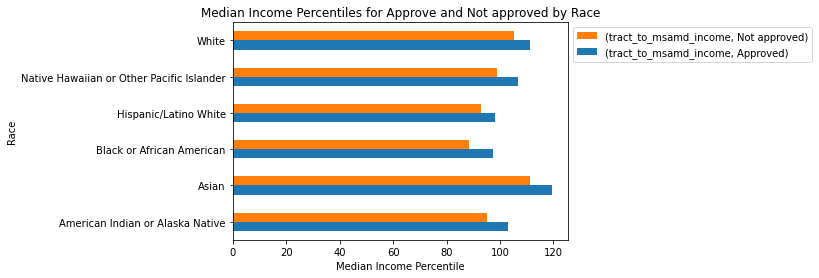

In [153]:
dff.groupby(['updated_race', 'action']).median().unstack().plot(kind='barh')
plt.ylabel('Race')
plt.xlabel('Median Income Percentile')
plt.title('Median Income Percentiles for Approve and Not approved by Race')
handles, labels = plt.gca().get_legend_handles_labels()
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], bbox_to_anchor=(1, 1)) 


Text(0.5, 1.0, 'Recall Scores per Race')

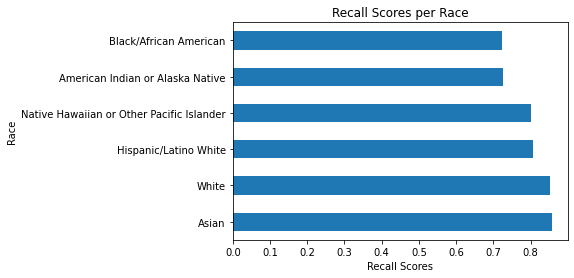

In [159]:
fairness = {'Asian':.8568,
'White': .8518,
'Hispanic/Latino White': .8059,
'Native Hawaiian or Other Pacific Islander':.8004,
'American Indian or Alaska Native':.7264,
'Black/African American': .7226
}

pd.Series(fairness).plot(kind='barh')
plt.xlabel('Recall Scores')
plt.ylabel('Race')
plt.title('Recall Scores per Race')